# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | natchez
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | solnechnyy
Processing Record 7 of Set 1 | glencoe
Processing Record 8 of Set 1 | sinabang
Processing Record 9 of Set 1 | shagonar
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | lowicz
Processing Record 14 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | acapulco de juarez
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | zuni pueblo
Processing Record 20 of Set 1 | qujing
Processing Record 21 of 

Processing Record 37 of Set 4 | ust'-ilimsk
Processing Record 38 of Set 4 | kourou
Processing Record 39 of Set 4 | vorkuta
Processing Record 40 of Set 4 | levuka
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | dezhou
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | romblon
Processing Record 45 of Set 4 | snyder
Processing Record 46 of Set 4 | cam ranh
Processing Record 47 of Set 4 | kosciuszko national park
City not found. Skipping...
Processing Record 48 of Set 4 | sonoita
Processing Record 49 of Set 4 | egilsstadir
Processing Record 0 of Set 5 | puerto san jose
Processing Record 1 of Set 5 | san antonio de pale
Processing Record 2 of Set 5 | nouadhibou
Processing Record 3 of Set 5 | tres lagoas
Processing Record 4 of Set 5 | lumphat
Processing Record 5 of Set 5 | san luis de la loma
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | hell-ville
Processing Record 8 of Set 5 | sidney
Processing Record 9 of Set 5 | gua

Processing Record 29 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 30 of Set 8 | progreso
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | sao raimundo nonato
Processing Record 33 of Set 8 | greenville
Processing Record 34 of Set 8 | terrace
Processing Record 35 of Set 8 | tahlequah
Processing Record 36 of Set 8 | filadelfia
Processing Record 37 of Set 8 | susuman
Processing Record 38 of Set 8 | marte
Processing Record 39 of Set 8 | soio
Processing Record 40 of Set 8 | camayenne
Processing Record 41 of Set 8 | stroitel'
Processing Record 42 of Set 8 | weno
Processing Record 43 of Set 8 | port moresby
Processing Record 44 of Set 8 | hobyo
Processing Record 45 of Set 8 | arvika
Processing Record 46 of Set 8 | miquelon
Processing Record 47 of Set 8 | arno
Processing Record 48 of Set 8 | bayanhongor
Processing Record 49 of Set 8 | ta`u
Processing Record 0 of Set 9 | nabire
Processing Record 1 of Set 9 | pelican bay
Processing Record 2 of Set 9 | 

Processing Record 17 of Set 12 | dwarka
Processing Record 18 of Set 12 | alenquer
Processing Record 19 of Set 12 | ca mau
Processing Record 20 of Set 12 | luganville
Processing Record 21 of Set 12 | amursk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,46.24,81,100,11.50,SJ,1689922989
1,natchez,31.5604,-91.4032,79.02,89,0,3.44,US,1689922738
2,margaret river,-33.9500,115.0667,60.31,61,40,13.82,AU,1689922990
3,yellowknife,62.4560,-114.3525,68.52,64,100,5.75,CA,1689922887
4,albany,42.6001,-73.9662,72.01,87,100,5.28,US,1689922990


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,46.24,81,100,11.50,SJ,1689922989
1,natchez,31.5604,-91.4032,79.02,89,0,3.44,US,1689922738
2,margaret river,-33.9500,115.0667,60.31,61,40,13.82,AU,1689922990
3,yellowknife,62.4560,-114.3525,68.52,64,100,5.75,CA,1689922887
4,albany,42.6001,-73.9662,72.01,87,100,5.28,US,1689922990


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

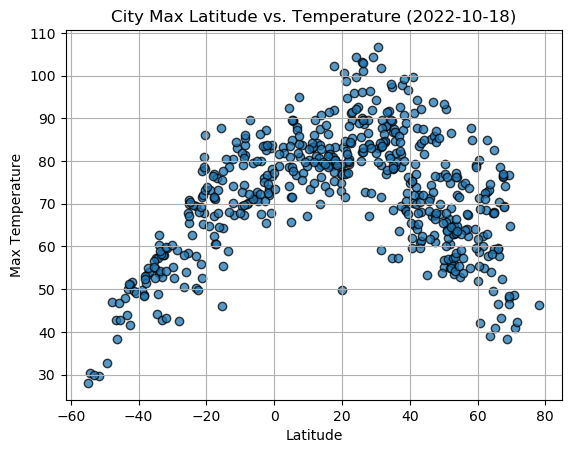

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Create a scatter plot for latitude vs max temperature.

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

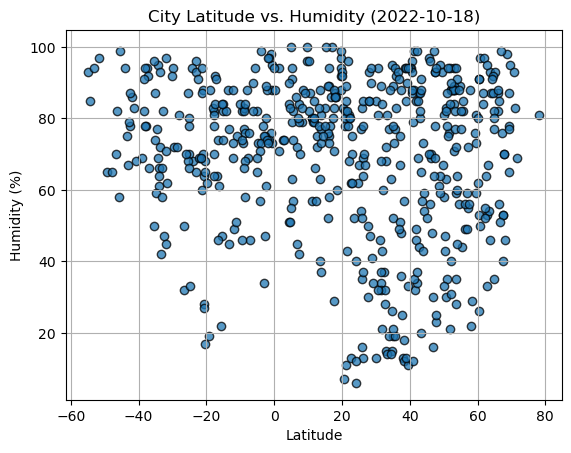

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

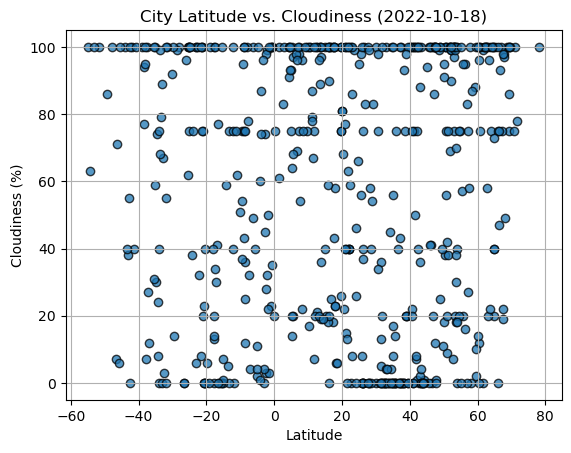

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

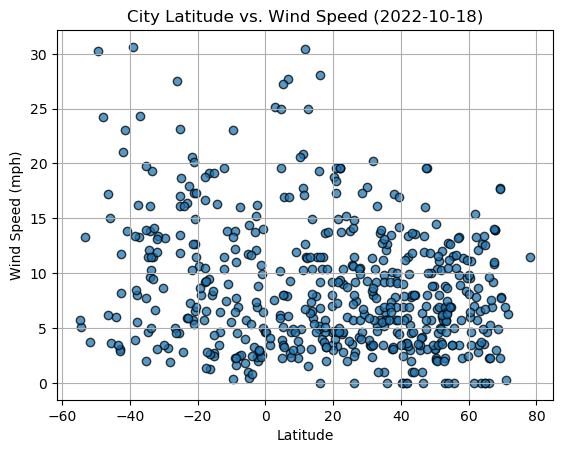

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [154]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    #plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.scatter(x_values, y_values, c='#4B9DDB', edgecolors="#4B9DDB")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the line on the plot in the middle
    x_range = max(x_values) - min(x_values)
    y_range = max(y_values) - min(y_values)
    x_text = min(x_values) + x_range * 0.4
    y_text = min(y_values) + y_range * 0.1
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_text, y_text), fontsize=12, color="red", ha='right', va='bottom')
    
    # Add labels and title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    r_text = f"r = {r_value:.2f}"
    
    print(r_text)
    # Save the figure
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()

In [155]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,46.24,81,100,11.50,SJ,1689922989
1,natchez,31.5604,-91.4032,79.02,89,0,3.44,US,1689922738
3,yellowknife,62.4560,-114.3525,68.52,64,100,5.75,CA,1689922887
4,albany,42.6001,-73.9662,72.01,87,100,5.28,US,1689922990
5,solnechnyy,50.7214,136.6319,92.21,30,100,10.36,RU,1689922991


In [156]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,60.31,61,40,13.82,AU,1689922990
6,glencoe,-28.1783,30.1470,42.57,81,100,1.86,ZA,1689922991
9,port elizabeth,-33.9180,25.5701,53.89,66,0,16.11,ZA,1689922992
10,port-aux-francais,-49.3500,70.2167,32.68,65,86,30.22,TF,1689922900
13,pisco,-13.7000,-76.2167,59.05,88,5,3.44,PE,1689922993


###  Temperature vs. Latitude Linear Regression Plot

r = -0.57


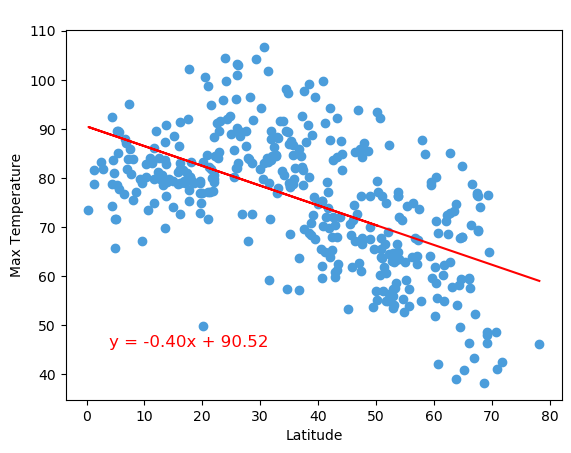

In [157]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature"," ", "../output_data/Northern_Hemi_Temp_vs_Latitude.png")

r = 0.85


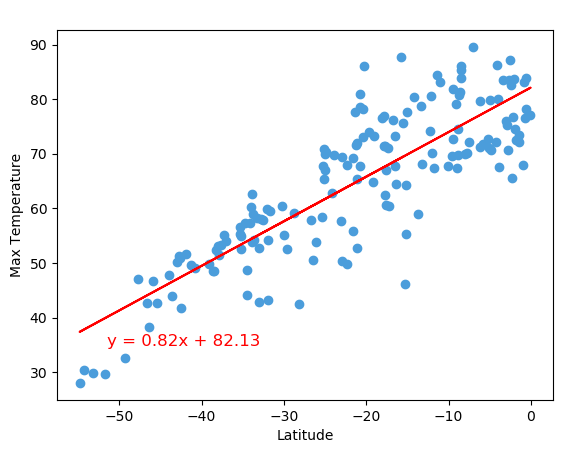

In [167]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", " ", "../output_data/Southern_Hemi_Temp_vs_Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r = -0.05


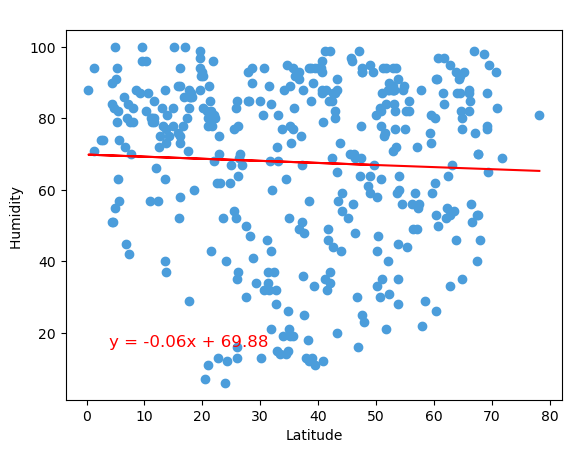

In [166]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity ", " ", "../output_data/Northern_Hemi_Humidity_vs_Latitude.png")

r = -0.06


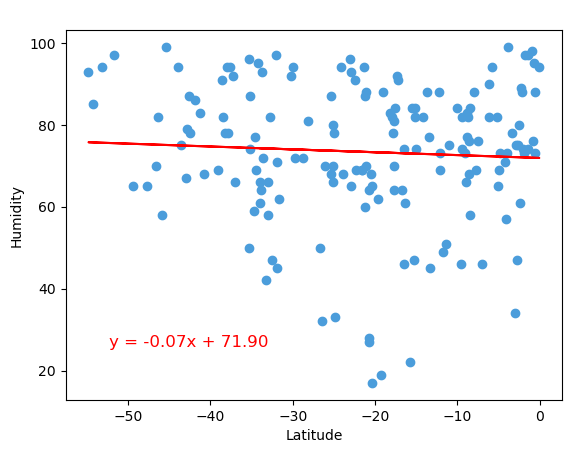

In [165]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", " ", "../output_data/Southern_Hemi_Humidity_vs_Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r = 0.03


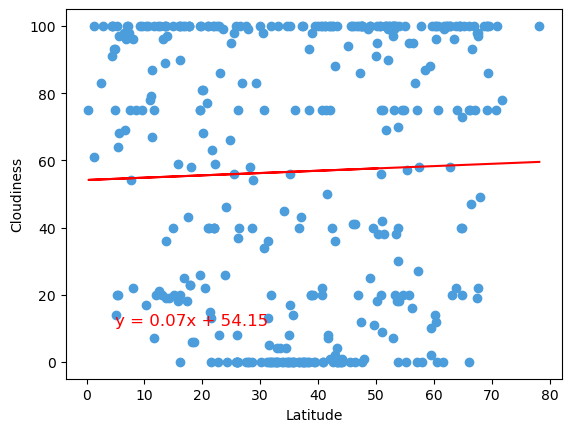

In [169]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "", "../output_data/Northern_Hemi_Cloudiness_vs_Latitude.png")

r = -0.18


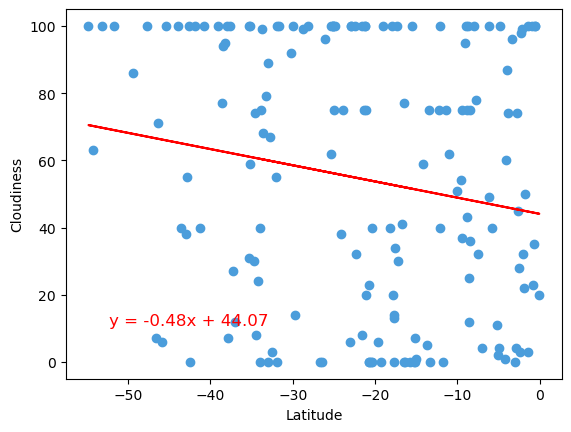

In [168]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "", "../output_data/Southern_Hemi_Cloudiness_vs_Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r = -0.17


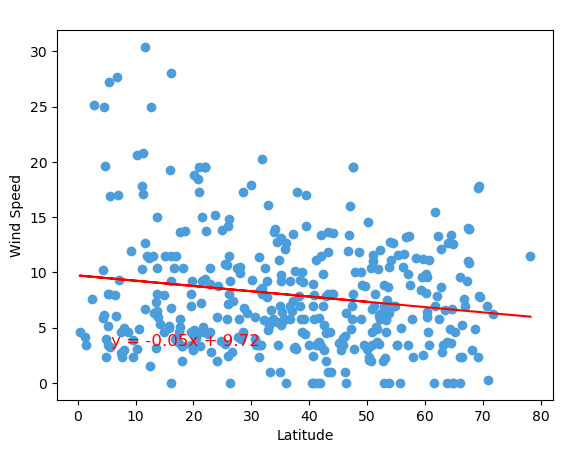

In [171]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", " ", "../output_data/Northern_Hemi_Wind_Speed_vs_Latitude.png")

r = -0.26


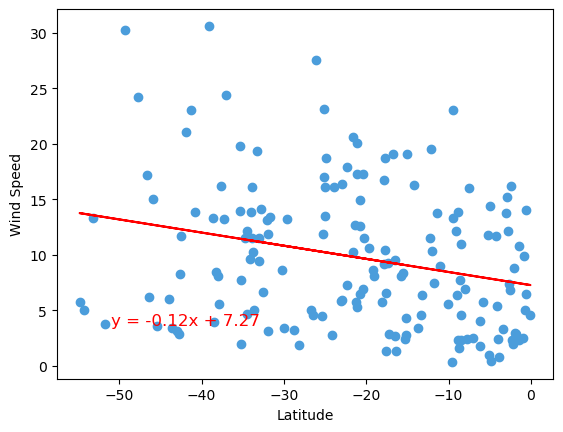

In [172]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "", "../output_data/Southern_Hemi_Wind_Speed_vs_Latitude.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE